In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import pandas as pd

import os

# EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import os

In [ ]:
df = pd.read_csv("asthma_dataset.csv")

In [ ]:
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Asthma_Diagnosis,Medication,Peak_Flow
0,1,26,Female,Non-Smoker,Yes,Inhaler,175
1,2,52,Female,Ex-Smoker,No,None,156
2,3,56,Female,Ex-Smoker,Yes,Inhaler,236
3,4,55,Male,Current Smoker,Yes,Controller Medication,378
4,5,43,Female,Current Smoker,No,None,159


In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Smoking_Status', 'Asthma_Diagnosis',
       'Medication', 'Peak_Flow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_ID        300 non-null    int64 
 1   Age               300 non-null    int64 
 2   Gender            300 non-null    object
 3   Smoking_Status    300 non-null    object
 4   Asthma_Diagnosis  300 non-null    object
 5   Medication        300 non-null    object
 6   Peak_Flow         300 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.5+ KB


In [ ]:
df['Medication'] = df['Medication'].fillna('No Medication')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_ID        300 non-null    int64 
 1   Age               300 non-null    int64 
 2   Gender            300 non-null    object
 3   Smoking_Status    300 non-null    object
 4   Asthma_Diagnosis  300 non-null    object
 5   Medication        300 non-null    object
 6   Peak_Flow         300 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.5+ KB


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Gender: ['Female' 'Male']
Unique values in Smoking_Status: ['Non-Smoker' 'Ex-Smoker' 'Current Smoker']
Unique values in Asthma_Diagnosis: ['Yes' 'No']
Unique values in Medication: ['Inhaler' 'None' 'Controller Medication']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               300 non-null    int64 
 1   Gender            300 non-null    object
 2   Smoking_Status    300 non-null    object
 3   Asthma_Diagnosis  300 non-null    object
 4   Medication        300 non-null    object
 5   Peak_Flow         300 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 14.2+ KB


# Plots

In [ ]:
summary_stats = df.describe()
print(summary_stats)

              Age   Peak_Flow
count  300.000000  300.000000
mean    39.666667  278.943333
std     14.059675   72.861027
min     18.000000  150.000000
25%     27.000000  216.500000
50%     39.000000  279.000000
75%     51.000000  340.250000
max     65.000000  400.000000


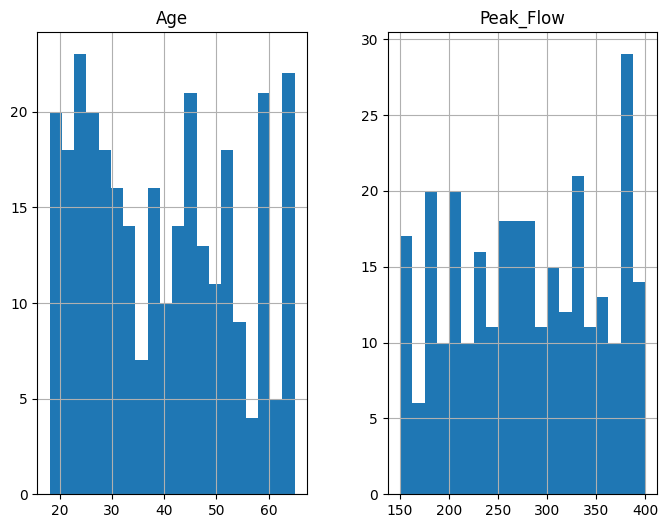

In [ ]:


numerical_columns = df.select_dtypes(include=['int64']).columns
df[numerical_columns].hist(bins=20, figsize=(8, 6))
plt.show()

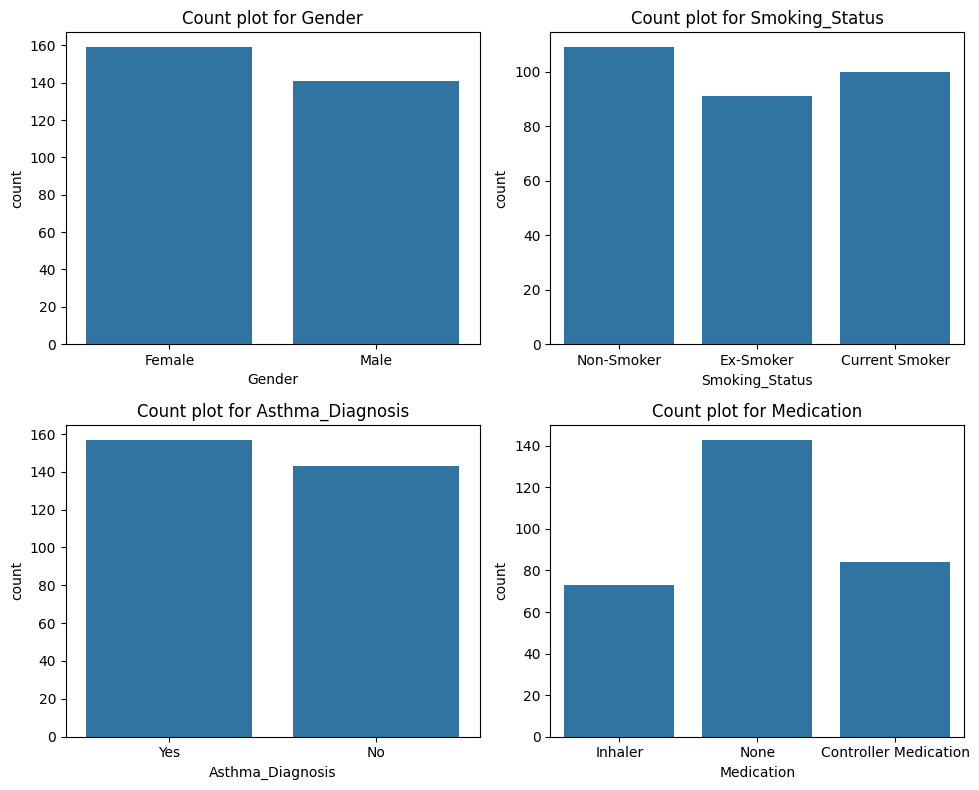

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, column in enumerate(categorical_columns[:2]):
    sns.countplot(x=column, data=df, ax=axes[0, i])
    axes[0, i].set_title(f'Count plot for {column}')

for i, column in enumerate(categorical_columns[2:]):
    sns.countplot(x=column, data=df, ax=axes[1, i])
    axes[1, i].set_title(f'Count plot for {column}')

plt.tight_layout()
plt.show()

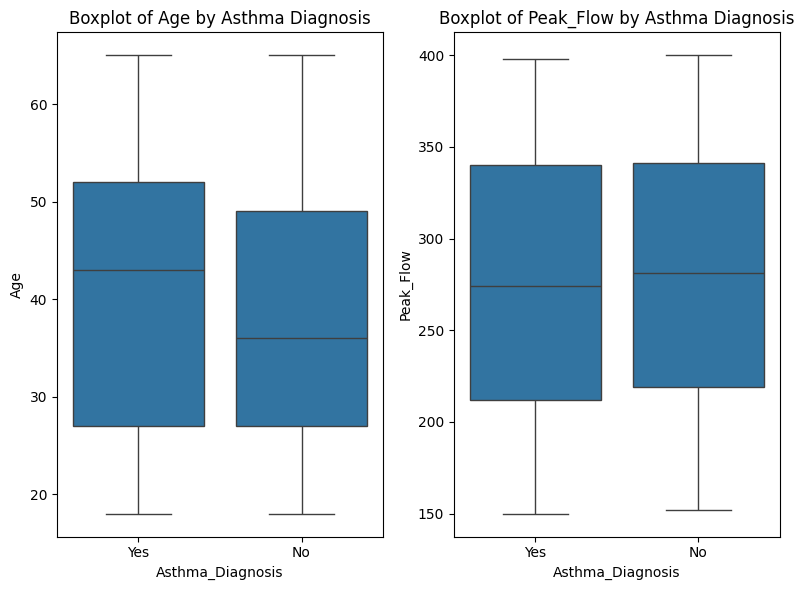

In [ ]:
numeric_columns = df.select_dtypes(include=['int64']).columns

fig, axes = plt.subplots(1, len(numeric_columns), figsize=(8, 6))

for i, column in enumerate(numeric_columns):
    sns.boxplot(x='Asthma_Diagnosis', y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column} by Asthma Diagnosis')

plt.tight_layout()
plt.show()


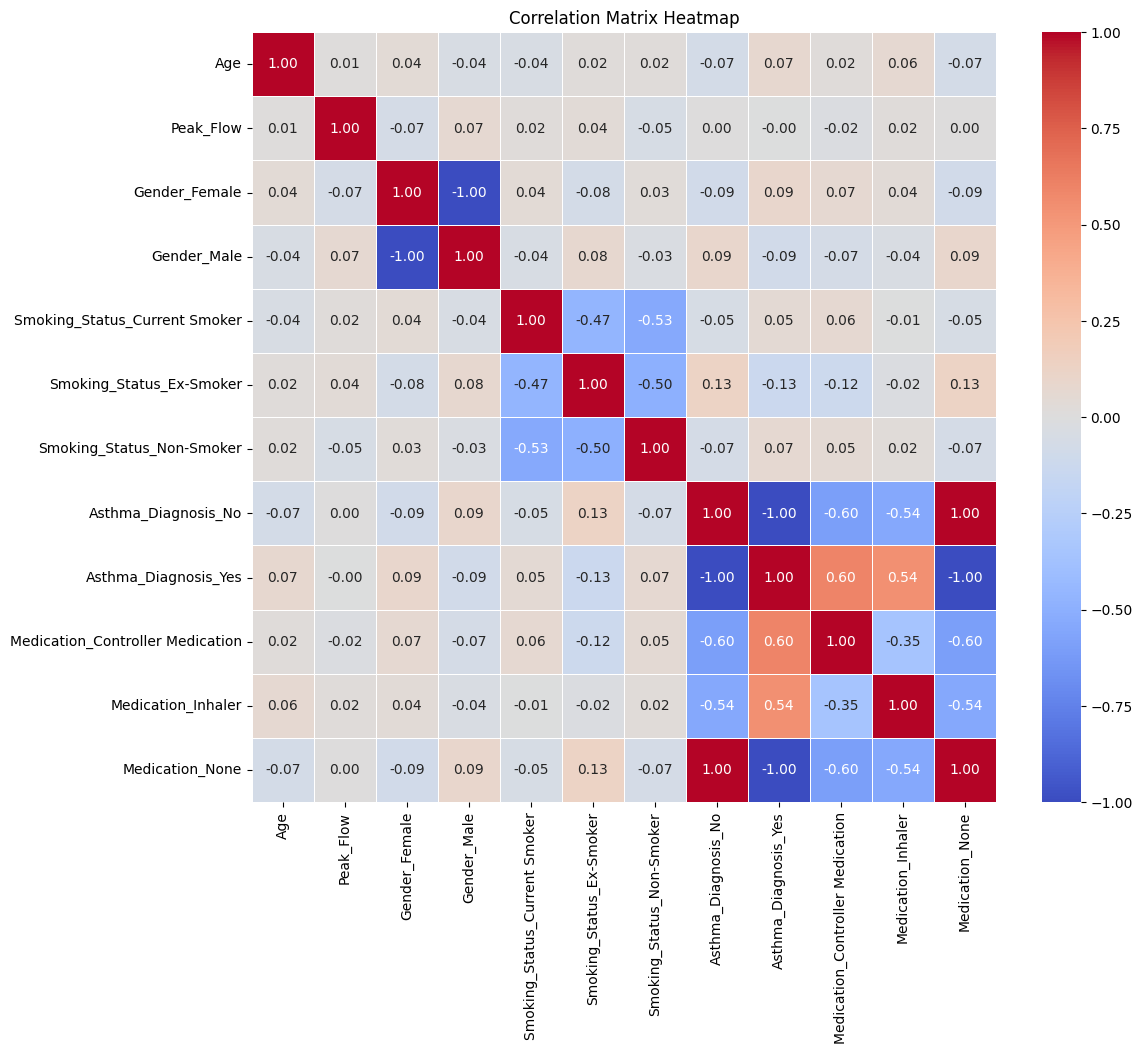

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Smoking_Status', 'Asthma_Diagnosis', 'Medication'])

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

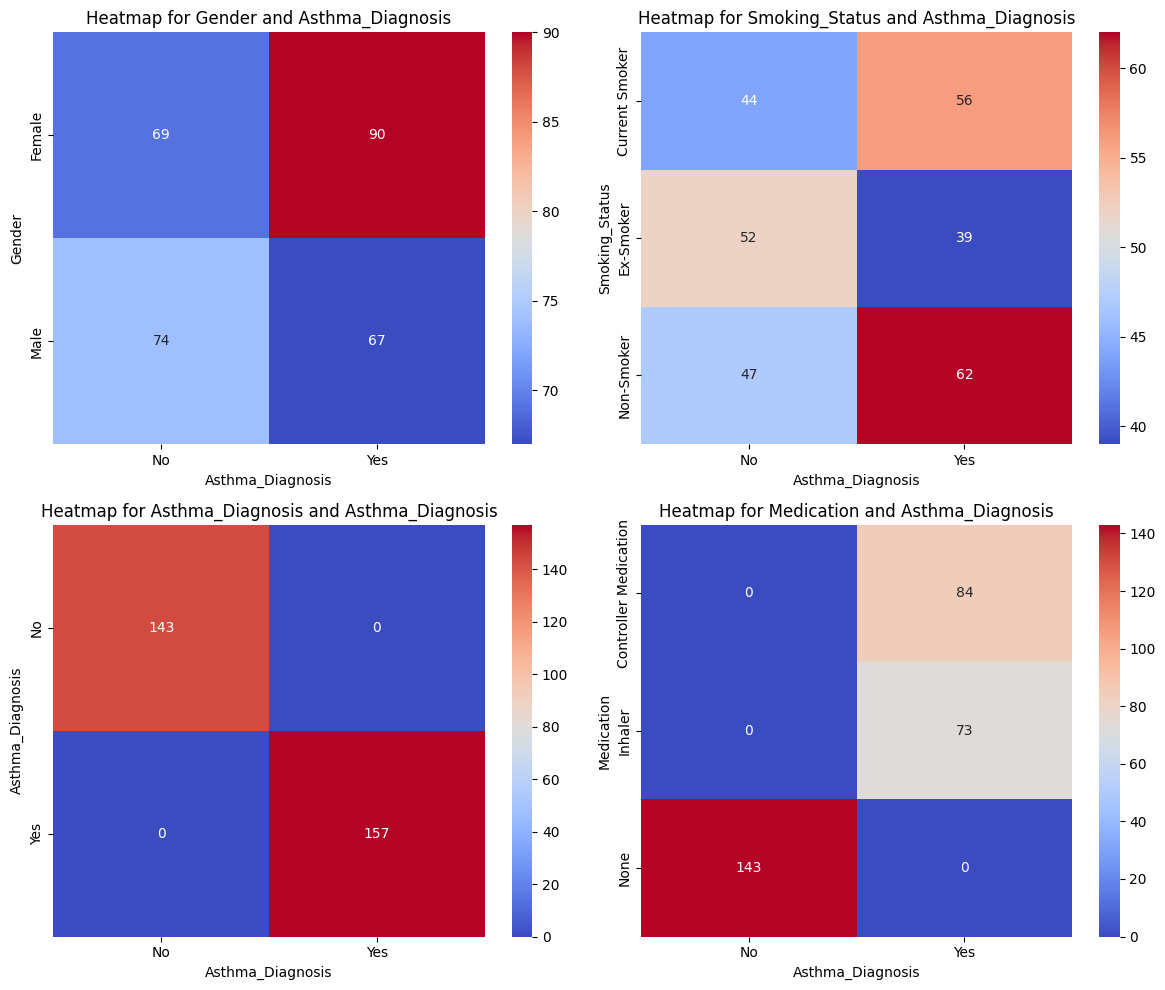

In [ ]:
categorical_columns = ['Gender', 'Smoking_Status', 'Asthma_Diagnosis', 'Medication']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, column in enumerate(categorical_columns):
    row, col = divmod(i, 2)
    cross_tab = pd.crosstab(df[column], df['Asthma_Diagnosis'])
    sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d', ax=axes[row, col])
    axes[row, col].set_title(f'Heatmap for {column} and Asthma_Diagnosis')

plt.tight_layout()
plt.show()